# First Jupyter notebook
Welcome to my first jupyter notebook in 2025! The first thing to know about this project is an  instructor-guided course from the book Data Science Projects with Python by Stephen_Klosterman

Below is the be a `code` for practice.

Loading the Case Study

In [131]:
# Load packages and check versions
import pandas as pd # Import pandas as pd
import numpy as np # Import numpy

import matplotlib.pyplot as plt # import plotting package
%matplotlib inline
import matplotlib as mpl # additional plotting functionality
import sklearn

# Import excel dataset as dataframe
df = pd.read_excel("default_of_credit_card_clients__courseware_version_1_21_19.xls")

In [132]:
# Checks
df.info() # info about columns
df.head() # first few rows of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Getting familiar with data and performing data cleaning

In [134]:
# Verifying basic data intergrity
df.columns # Examine column names

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [135]:
df.shape # Review number of rows and columns

(30000, 25)

In [136]:
df["ID"].nunique() # Count unique IDs

29687

In [137]:
# List how often unique IDs occur
id_counts = df["ID"].value_counts()
id_counts.head()

ID
ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
Name: count, dtype: int64

In [138]:
# Display number of grouped duplicated entries by running another value count
id_counts.value_counts()

count
1    29374
2      313
Name: count, dtype: int64

In [139]:
# Creating Boolean masks(logical mask) to further clean the data
# first I learn about how it works

In [140]:

np.random.seed(seed=24)

In [141]:
random_integers = np.random.randint(low=1, high=5, size=100) # “ Generate 100 random integers, chosen from between 1 and 5 (inclusive).
random_integers[:5] # “first five elements of this array

array([3, 4, 1, 4, 2])

In [142]:
is_equal_to_3 = random_integers == 3 # To “know the locations of all elements of random_integers equal to 3.
is_equal_to_3[:5]

array([ True, False, False, False, False])

In [143]:
sum(is_equal_to_3)

22

In [144]:
random_integers[is_equal_to_3]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [145]:
# Continuing Verification of Data Integrity
dupe_mask = id_counts == 2 # Assign the indices of the duplicated IDs to a variable
dupe_mask[0:5]

ID
ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: count, dtype: bool

In [146]:
id_counts.index[0:5]

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9'],
      dtype='object', name='ID')

In [147]:
dupe_ids = id_counts.index[dupe_mask] # Store the duplicated IDs in a new variable
len(dupe_ids)

313

In [148]:
# “verify the data in dupe_ids by displaying the first five entries using the following command:”
dupe_ids[0:5]

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9'],
      dtype='object', name='ID')

In [149]:
# Filtering the DataFrame in order to view all the columns for the first three duplicate IDs”
df.loc[df["ID"].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Create a Boolean matrix of the same size as the entire DataFrame using ==, as shown:
`df_zero_mask = df == 0`. 
The process involves creating a Boolean series (`feature_zero_mask`) from a DataFrame (`df_zero_mask`) to identify rows where all values from the second column onward are `0`. This is done by using `.iloc` to select all rows and columns starting from the second, then applying the `.all()` method along the column axis (`axis=1`) to check if all selected values in each row are `True`.


In [151]:
df_zero_mask = df == 0
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)

315

In [152]:
# “eliminating the rows with all zeros, except for the ID
df_clean_1 = df.loc[~feature_zero_mask,:].copy()
df_clean_1.shape

(29685, 25)

In [153]:
df_clean_1["ID"].nunique() # “the number of unique IDs”


29685

In [154]:
# Exploration
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


In [155]:
# Taking a closer look at PAY_1
df_clean_1["PAY_1"].head(5) # O values not documented in the data dictionary

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [156]:
df_clean_1["PAY_1"].value_counts() # 0 and -2 not documented

PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64

In [157]:
valid_pay_1_mask = df_clean_1["PAY_1"] != "Not available" # “find all the rows that don't have missing data for the PAY_1 feature”
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [158]:
sum(valid_pay_1_mask)

26664

In [159]:
# Data after eliminating rows with the missing values of PAY_1
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()
df_clean_2.shape

(26664, 25)

In [160]:
df_clean_2["PAY_1"].value_counts()

PAY_1
0     13087
-1     5047
1      3261
-2     2476
2      2378
3       292
4        63
5        23
8        17
6        11
7         9
Name: count, dtype: int64

In [161]:
df_clean_2["PAY_1"] = df_clean_2["PAY_1"].astype("int64")
df_clean_2[["PAY_1", "PAY_2"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


Exploring the Credit Limit and Demographic Features

In [163]:

mpl.rcParams["figure.dpi"] = 400 # high resolution figures

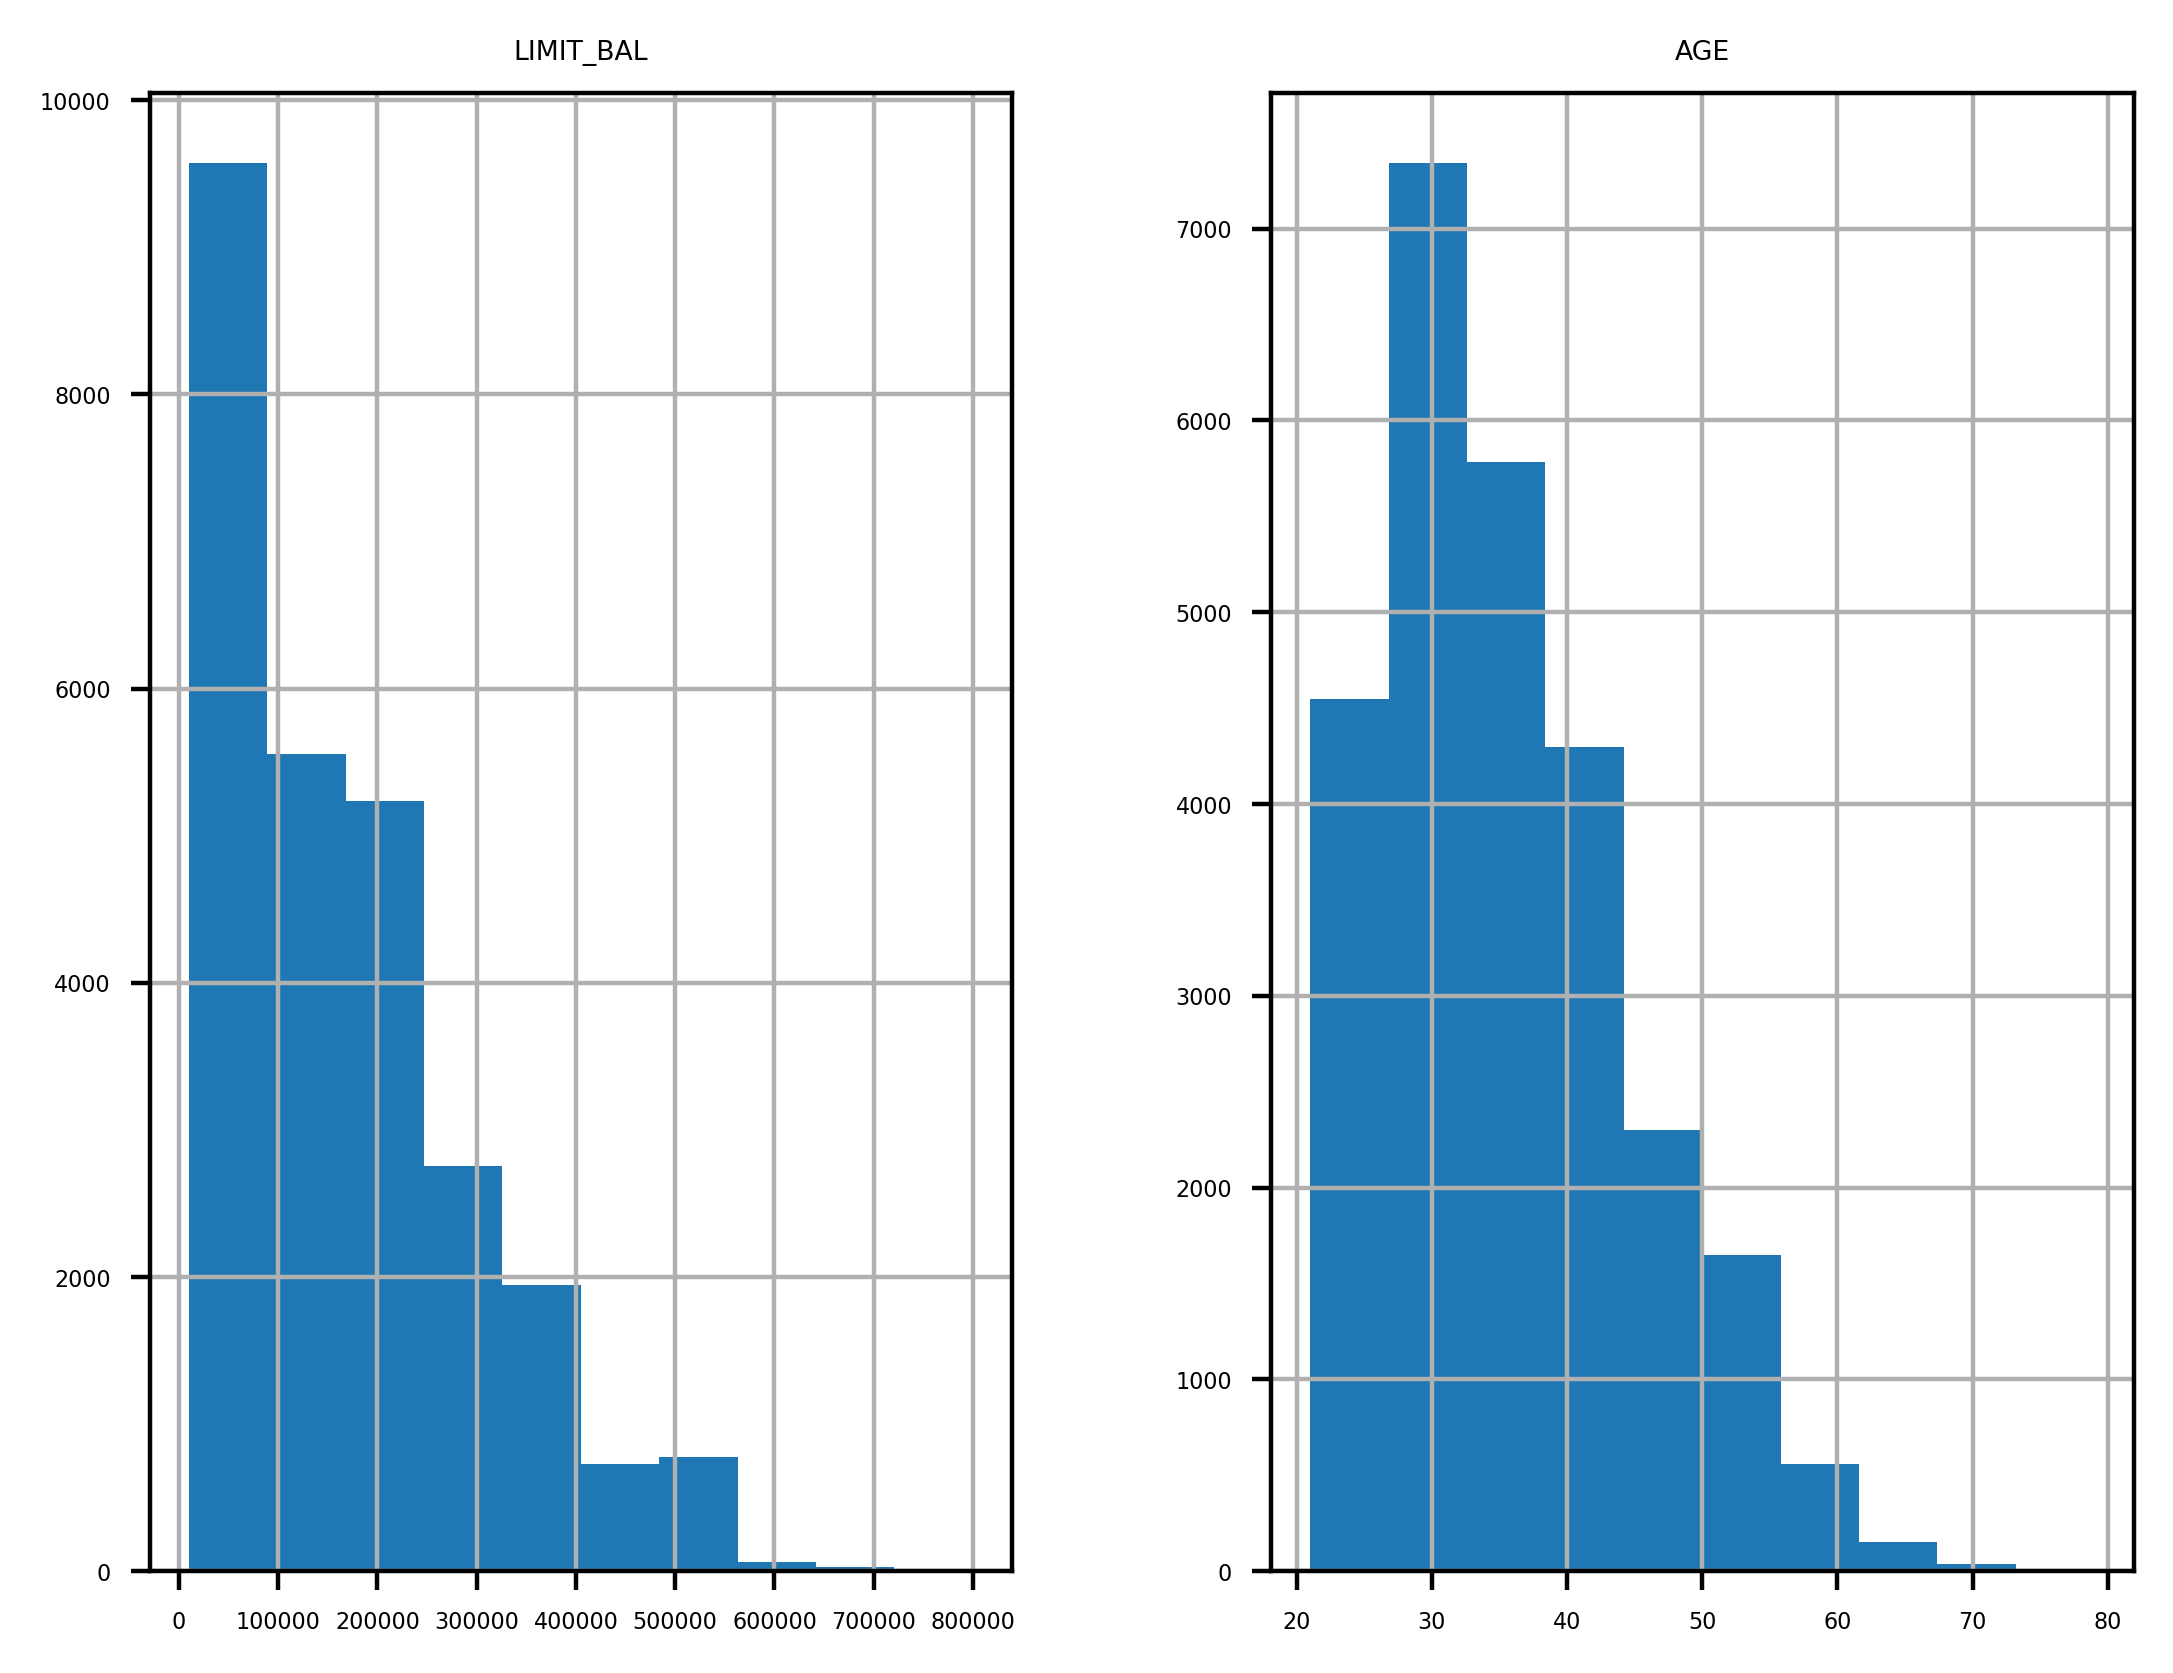

In [164]:
df_clean_2[["LIMIT_BAL", "AGE"]].hist()
plt.show()

In [165]:
df_clean_2[["LIMIT_BAL", "AGE"]].describe() # Summary statistics

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [166]:
# Obtain value counts for education
df_clean_2["EDUCATION"].value_counts() # undocumented education levels 0, 5 and 6 will be lumped in the 'others' category

EDUCATION
2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: count, dtype: int64

In [167]:
# Combining undocumented levels of EDUCATION with others
df_clean_2["EDUCATION"].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2["EDUCATION"].value_counts()

/var/folders/3n/zwf8c_0s4p114jjw3v5nwcpm0000gn/T/ipykernel_1724/263492313.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2["EDUCATION"].replace(to_replace=[0, 5, 6], value=4, inplace=True)


EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

In [168]:
# Obtain value counts for marriage
df_clean_2["MARRIAGE"].value_counts() # change undocumented 0 to 3


MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64

In [169]:
df_clean_2["MARRIAGE"].replace(to_replace=0, value=3, inplace=True)
df_clean_2["MARRIAGE"].value_counts()

/var/folders/3n/zwf8c_0s4p114jjw3v5nwcpm0000gn/T/ipykernel_1724/1165016580.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2["MARRIAGE"].replace(to_replace=0, value=3, inplace=True)


MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64

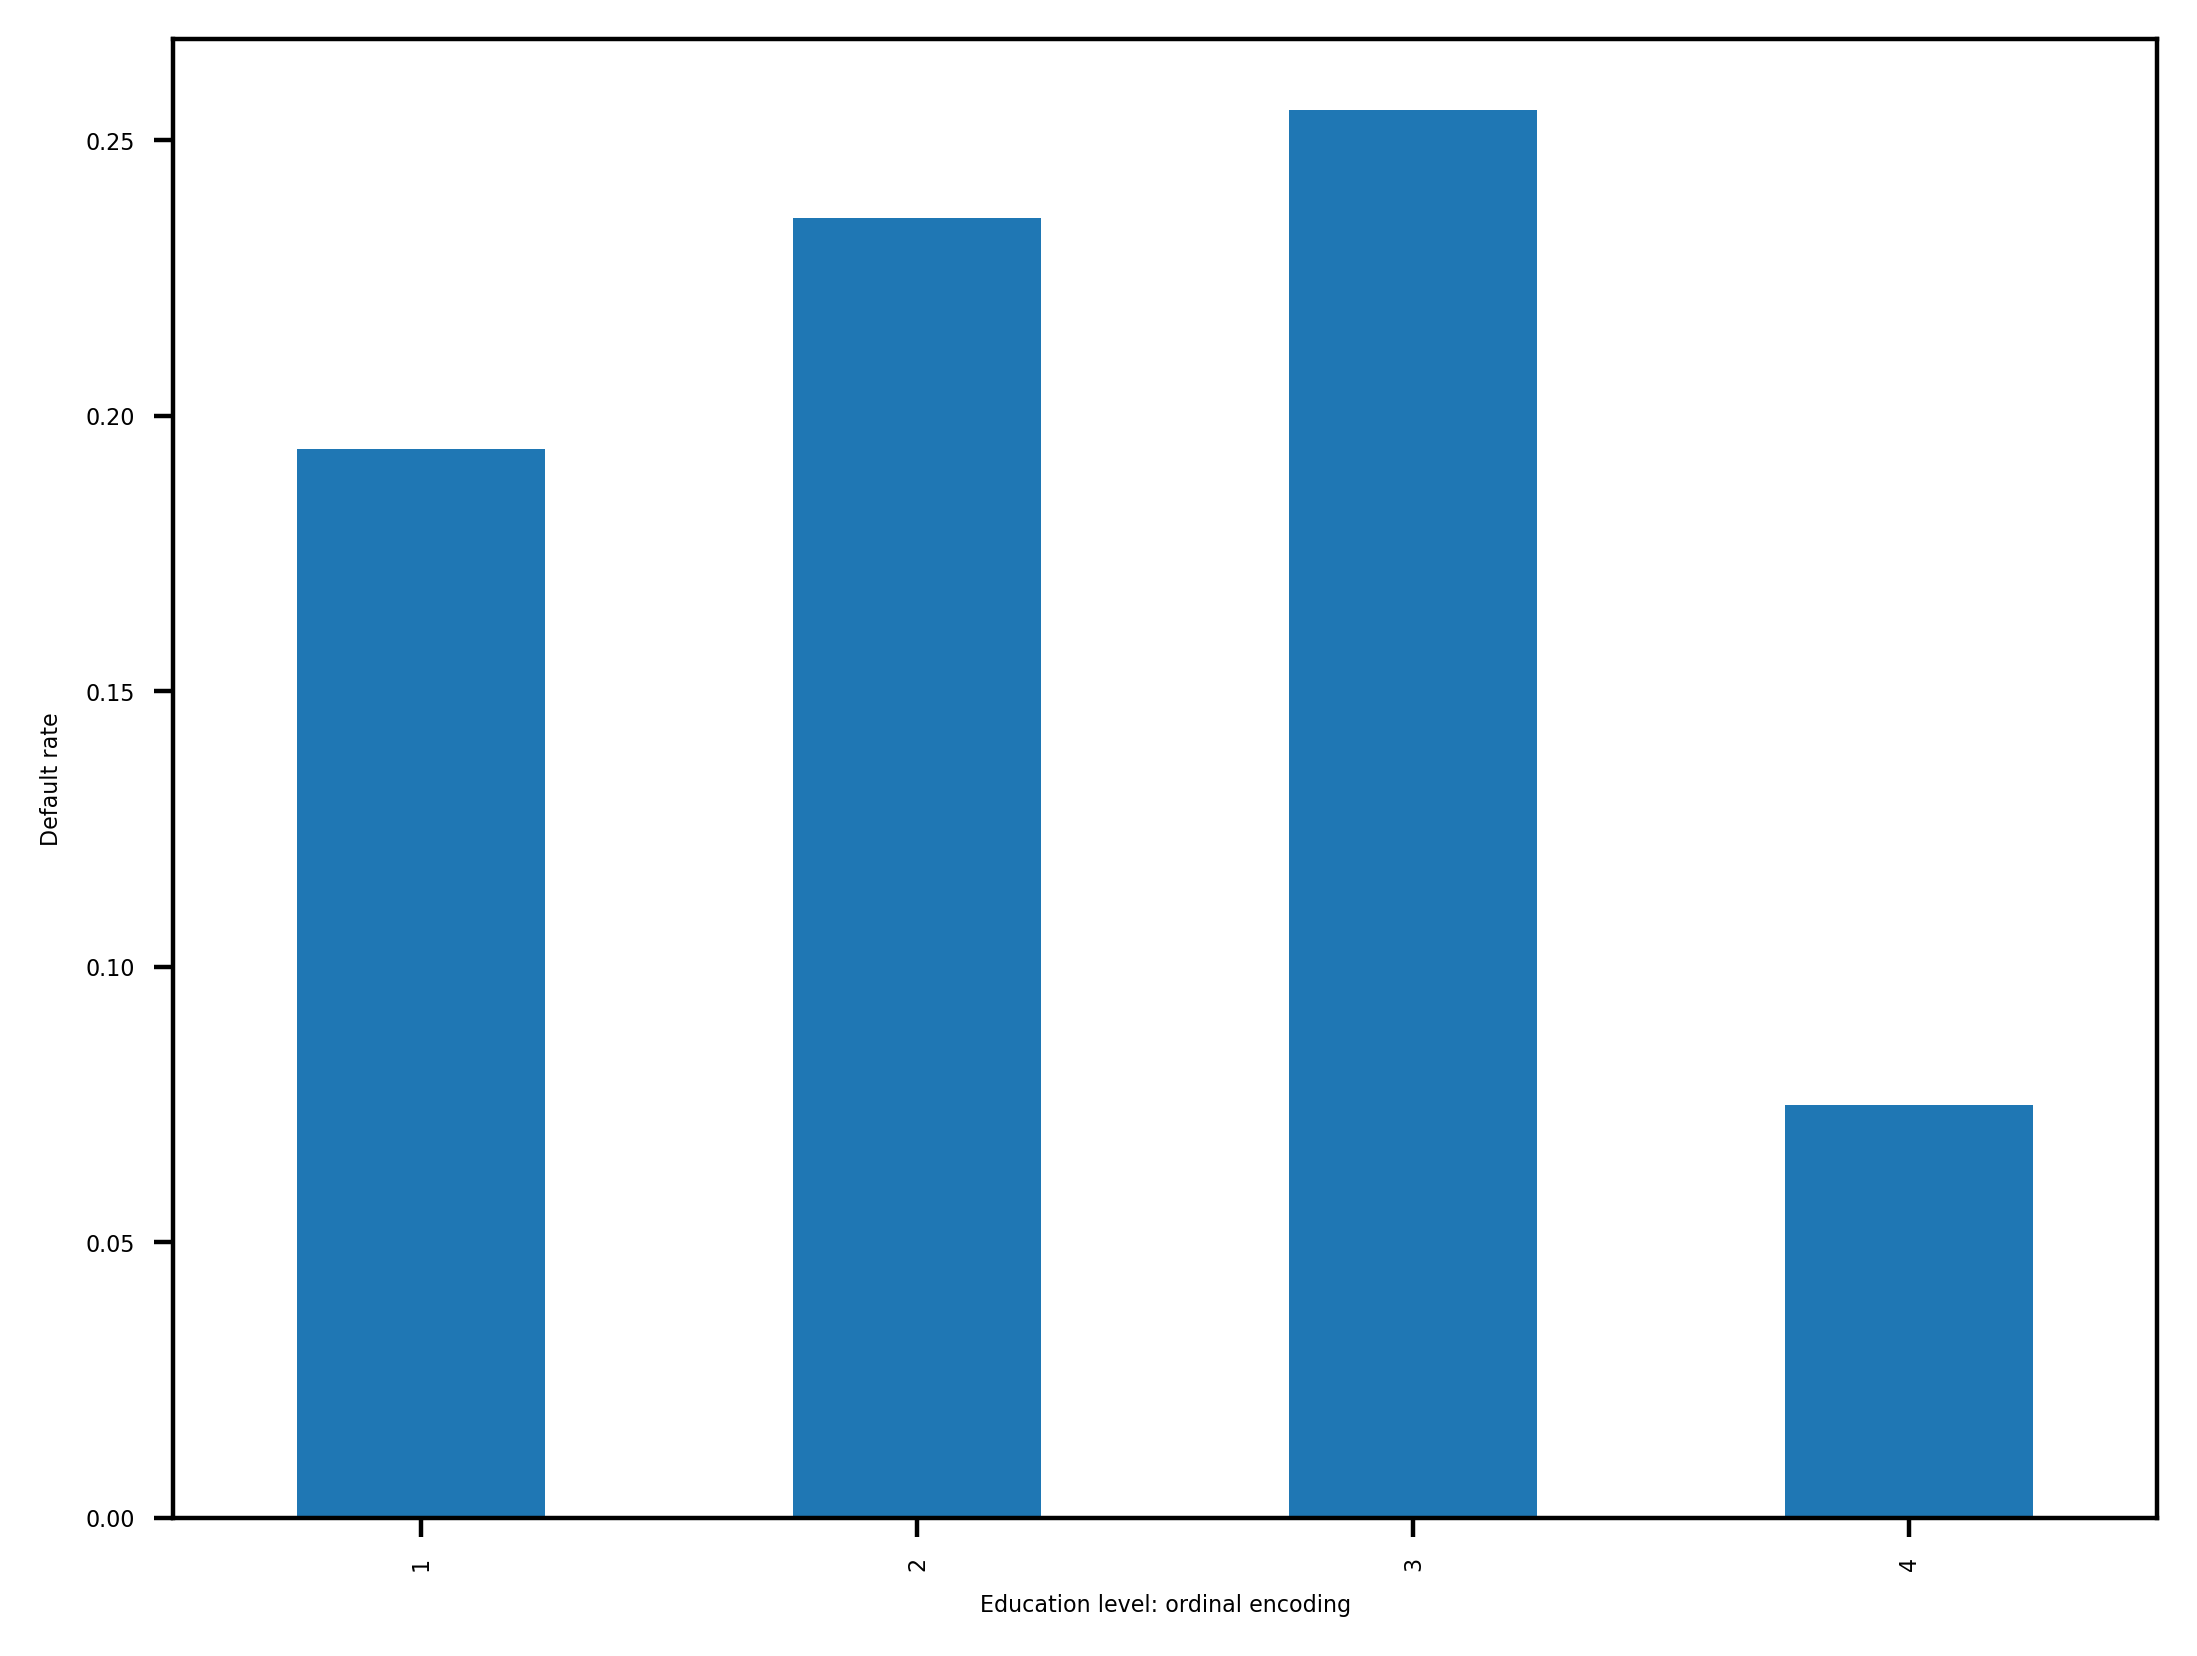

In [170]:
df_clean_2.groupby("EDUCATION").agg({"default payment next month":"mean"}).plot.bar(legend=False)
plt.ylabel("Default rate")
plt.xlabel("Education level: ordinal encoding")
plt.show()

In [171]:
# Use of one-hot-encoding(OHE) to encode categorical features
df_clean_2["EDUCATION_CAT"] = 'none'
df_clean_2[["EDUCATION", "EDUCATION_CAT"]].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [172]:
# “map the numbers in EDUCATION on to the strings they represent. For example, where the EDUCATION column equals the number 1, we'll assign the 'graduate school”
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}
df_clean_2["EDUCATION_CAT"] = df_clean_2["EDUCATION"].map(cat_mapping)
df_clean_2[["EDUCATION", "EDUCATION_CAT"]].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [173]:
# Creating OHE of education
edu_ohe = pd.get_dummies(df_clean_2["EDUCATION_CAT"]).astype(int)
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [174]:
# “Concatenate the one-hot encoded DataFrame to the original DataFrame as follows”

df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[["EDUCATION_CAT", "graduate school", "high school", "university", "others"]].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [175]:
# Save DataFrame with OHE column
df_with_ohe.to_csv("cleaned_data.cvs", index=False)

In [176]:
# Exploring financial history
df = pd.read_csv("/Users/hakeemusman/Library/CloudStorage/OneDrive-AshesiUniversity/DataScience/DataScience_Projects_Stephen_Klosterman/Projects_Python_master/Data/cleaned_data.cvs")


In [177]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [178]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [179]:
df.shape

(26664, 30)

In [180]:
# Payment Status
pay_feats = ["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [181]:
# Value count of PAY_1
df[pay_feats[0]].value_counts().sort_index()

PAY_1
-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: count, dtype: int64

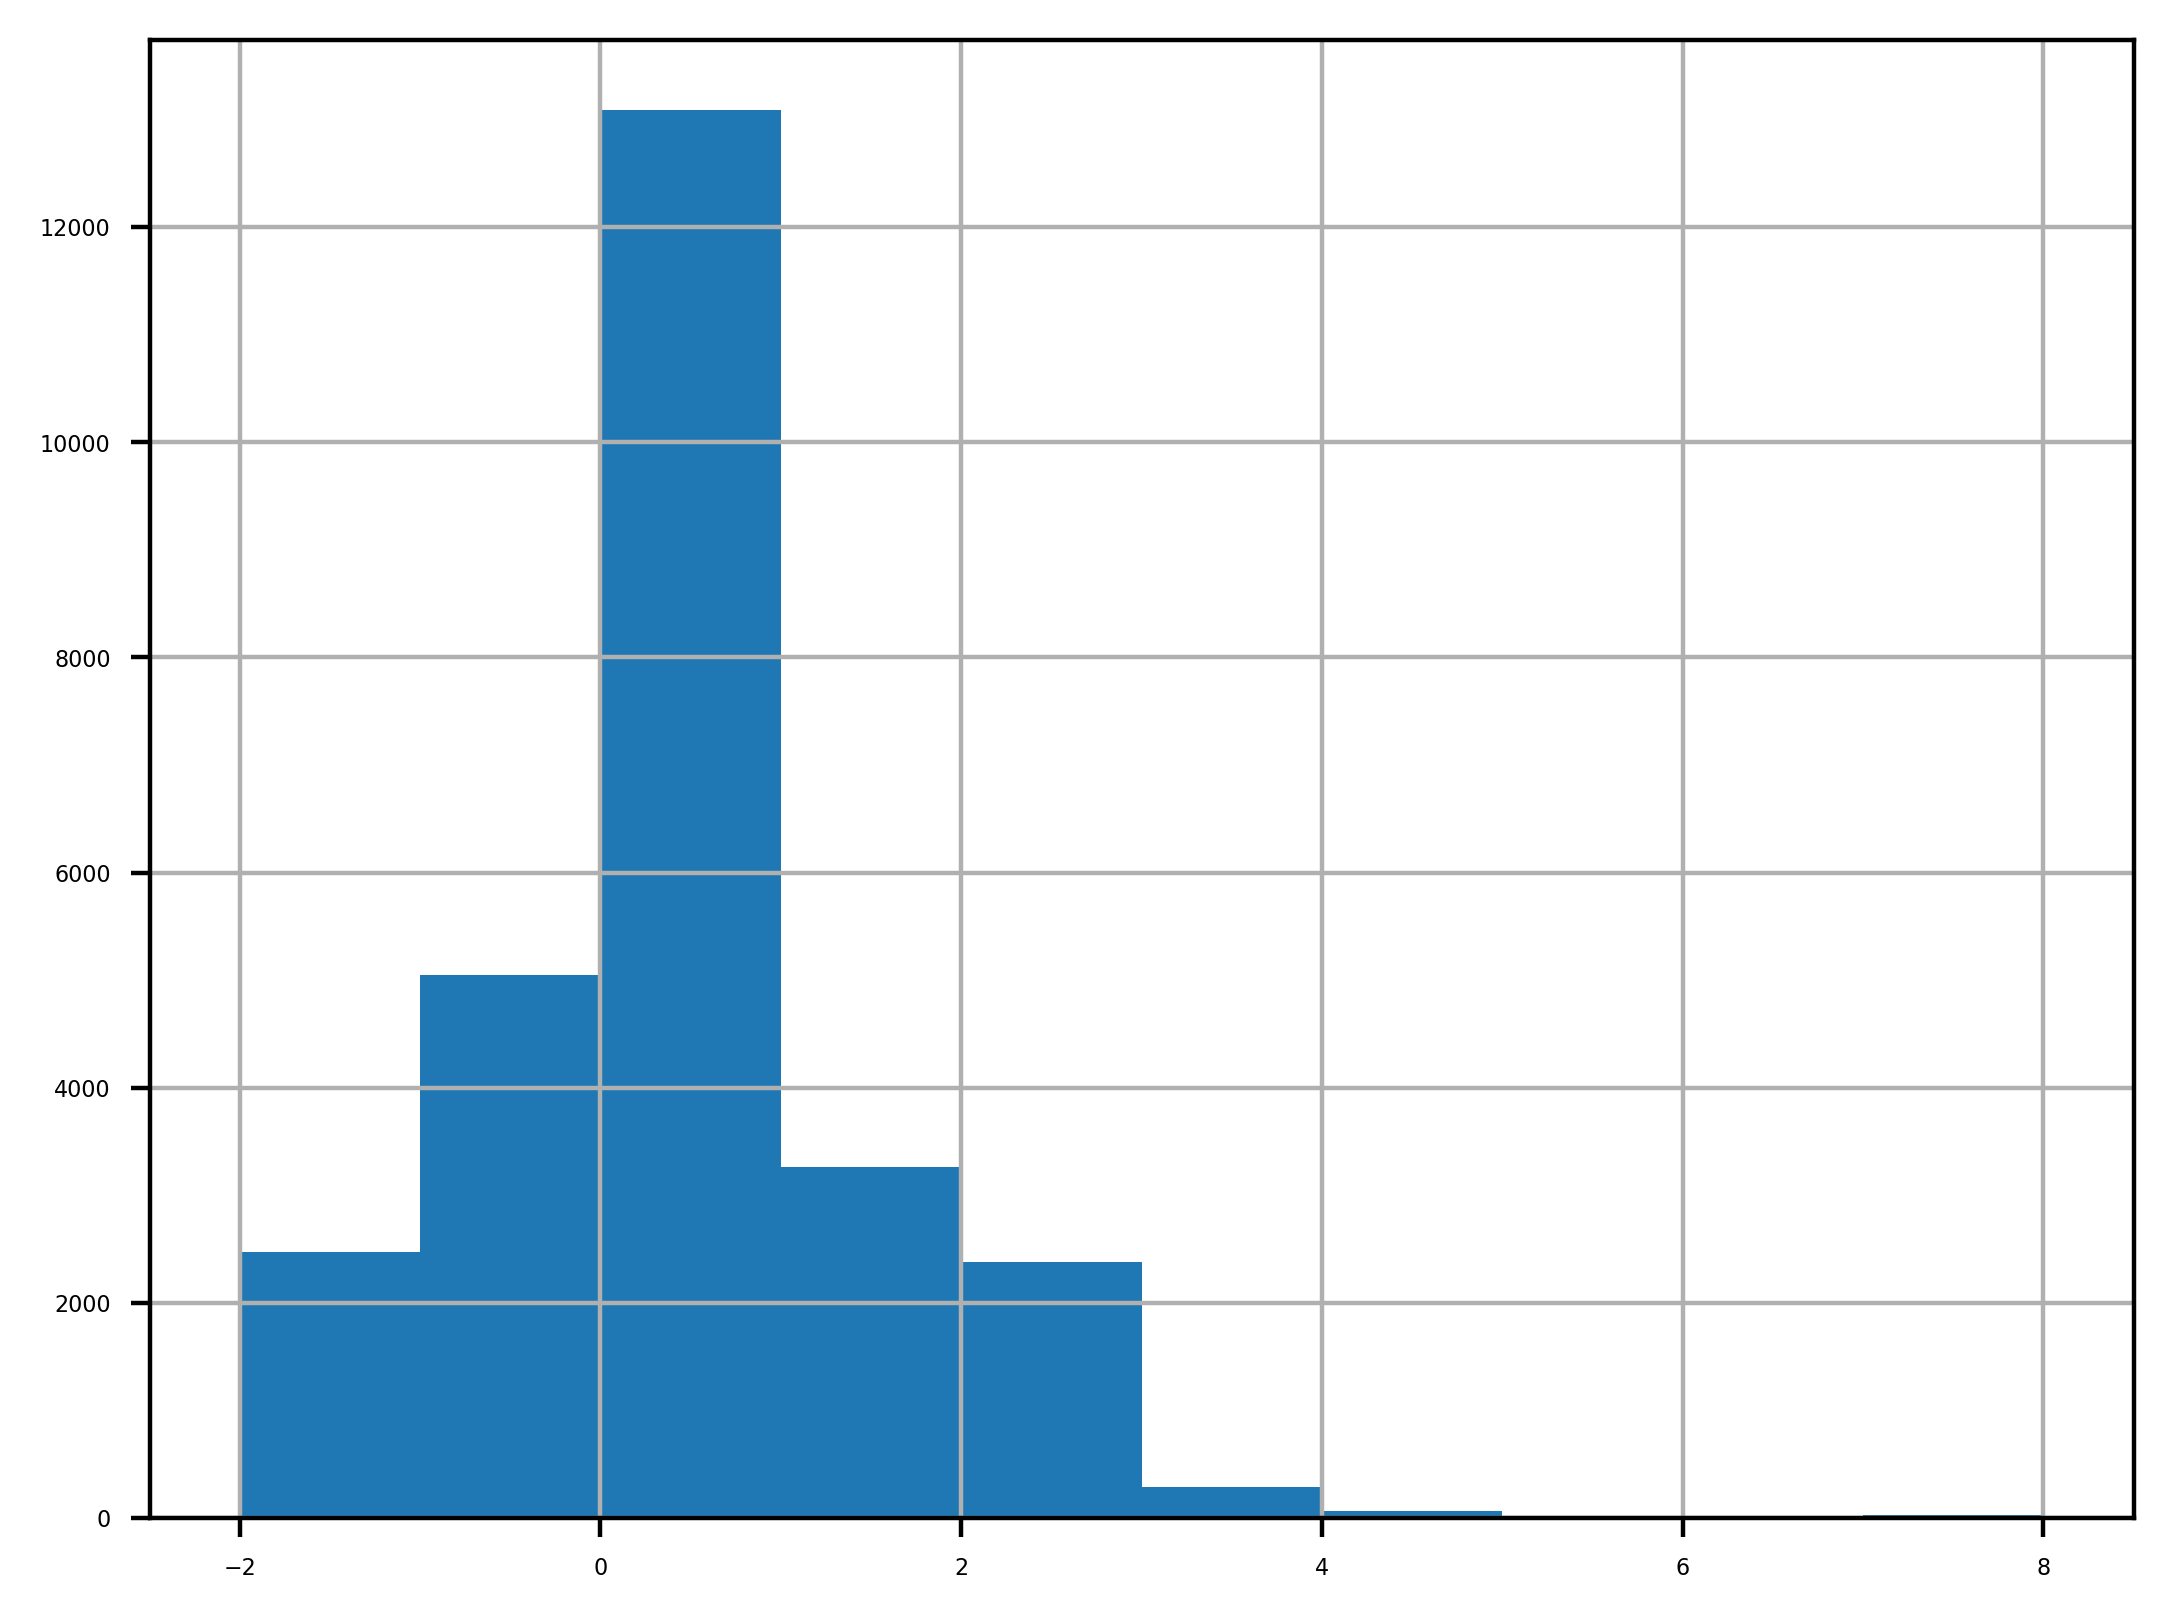

In [182]:
df[pay_feats[0]].hist()
plt.show()

In [183]:
# Create accurate and representative data visualizations
pay_1_bins = np.array(range(-2,10))-0.5 
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

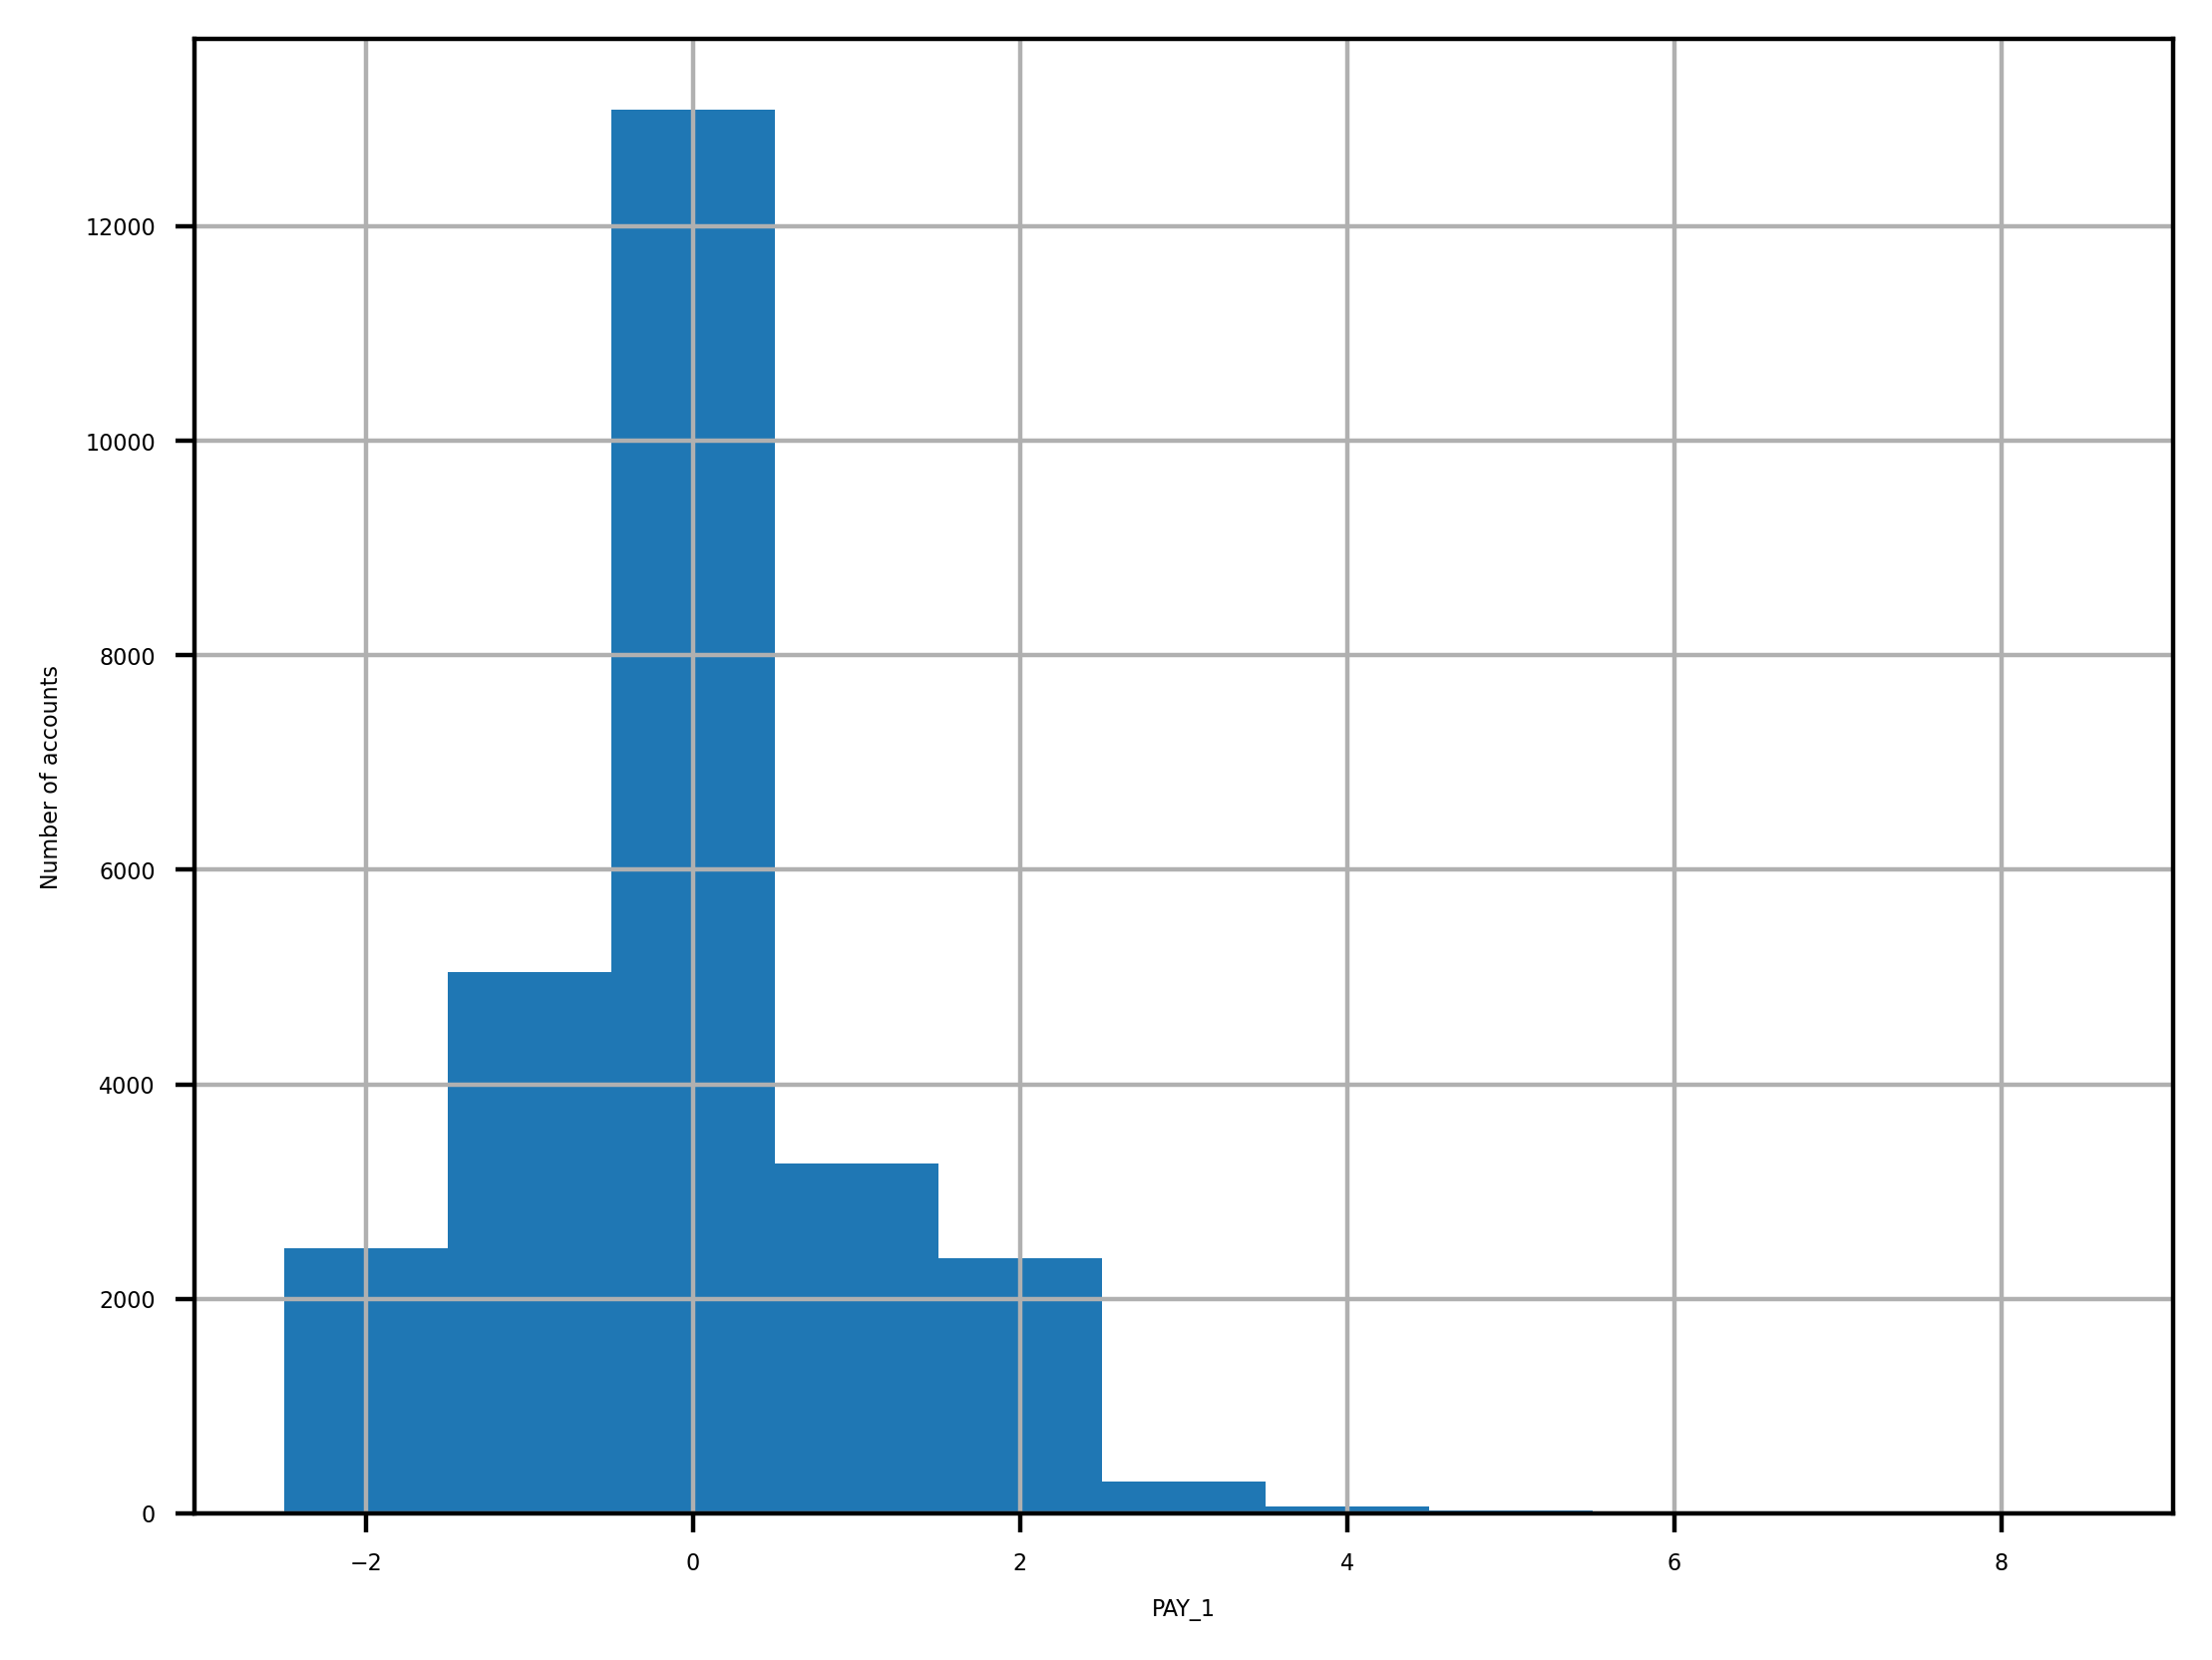

In [184]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel("PAY_1")
plt.ylabel("Number of accounts")
plt.show()

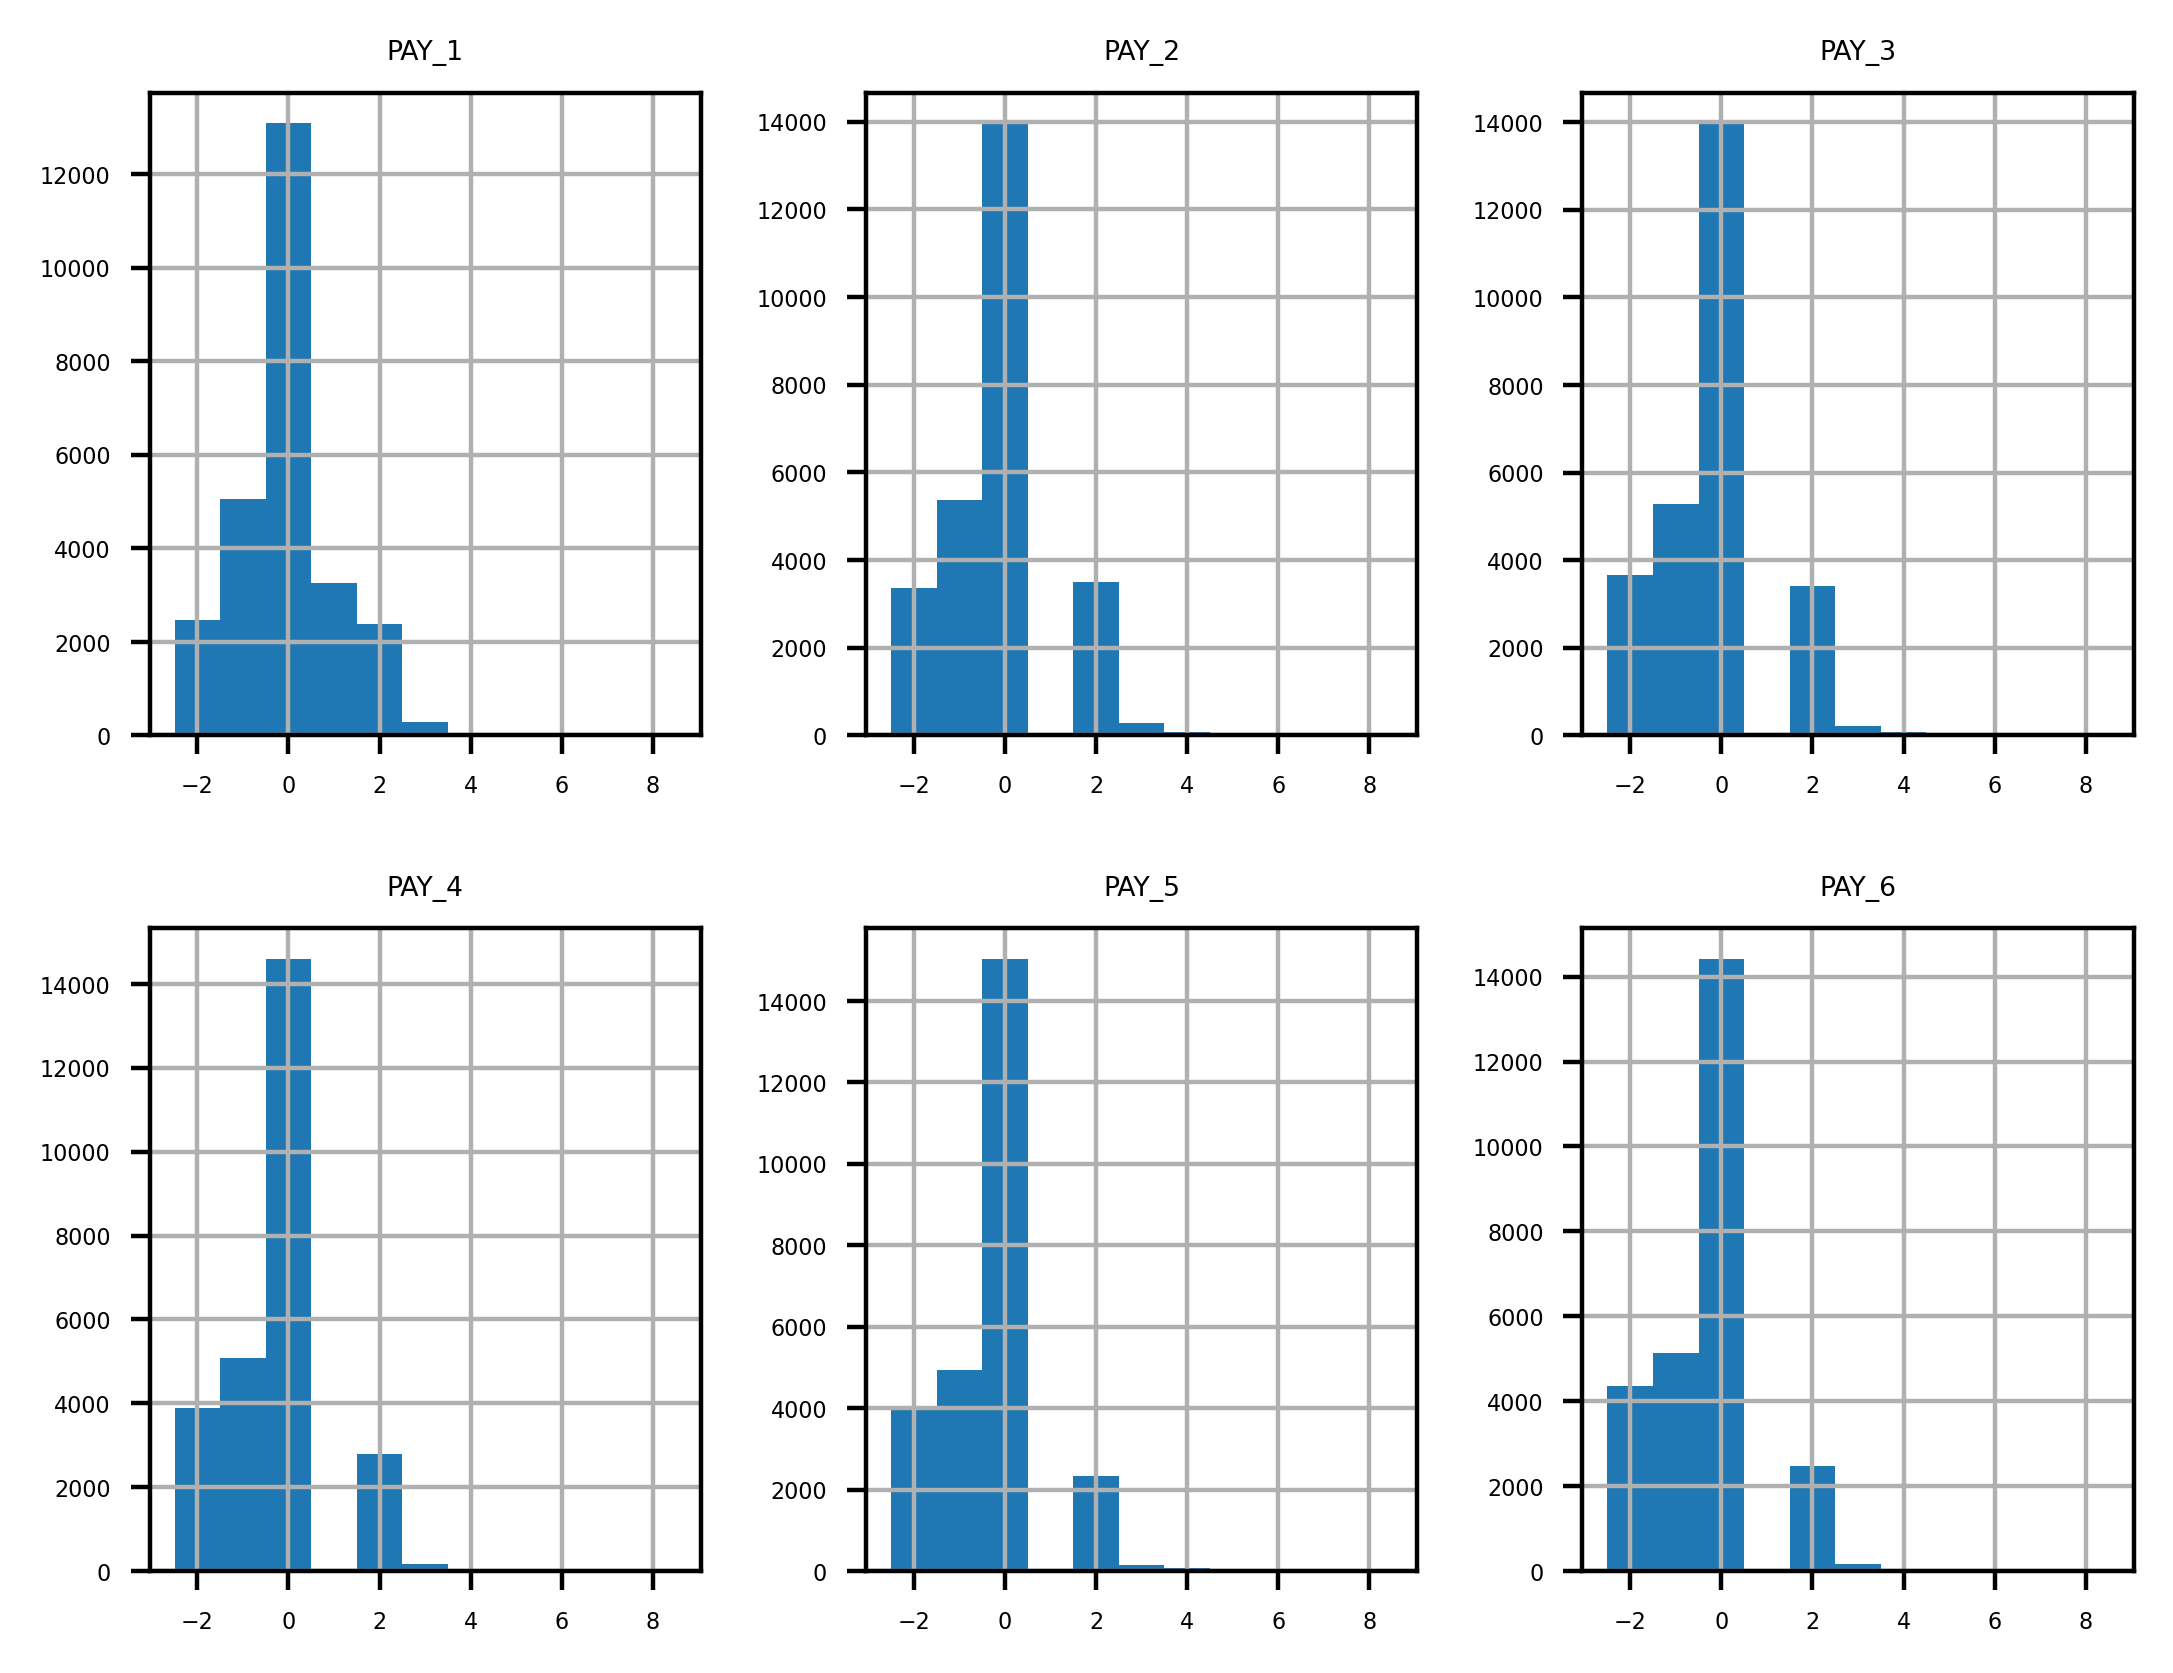

In [185]:
mpl.rcParams["font.size"] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))
plt.show()

In [186]:
# “look at accounts with a 2-month delay in August 
df.loc[df["PAY_2"]==2,["PAY_2", "PAY_3"]].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


In [187]:
# “Exploring Remaining Financial Features in the Dataset”
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [188]:
df[bill_feats].describe()


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


In [189]:
df[bill_feats].hist(bins=20, layout=(2,3))


array([[<Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>],
       [<Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>]], dtype=object)

In [190]:
df[pay_amt_feats].describe()


,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


In [252]:
df[pay_amt_feats].hist(layout=(2,3), xrot=30)
plt.show()

array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

In [254]:
pay_zero_mask = df[pay_amt_feats] == 0


In [256]:
pay_zero_mask.head()


,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [258]:
pay_zero_mask.sum()


PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

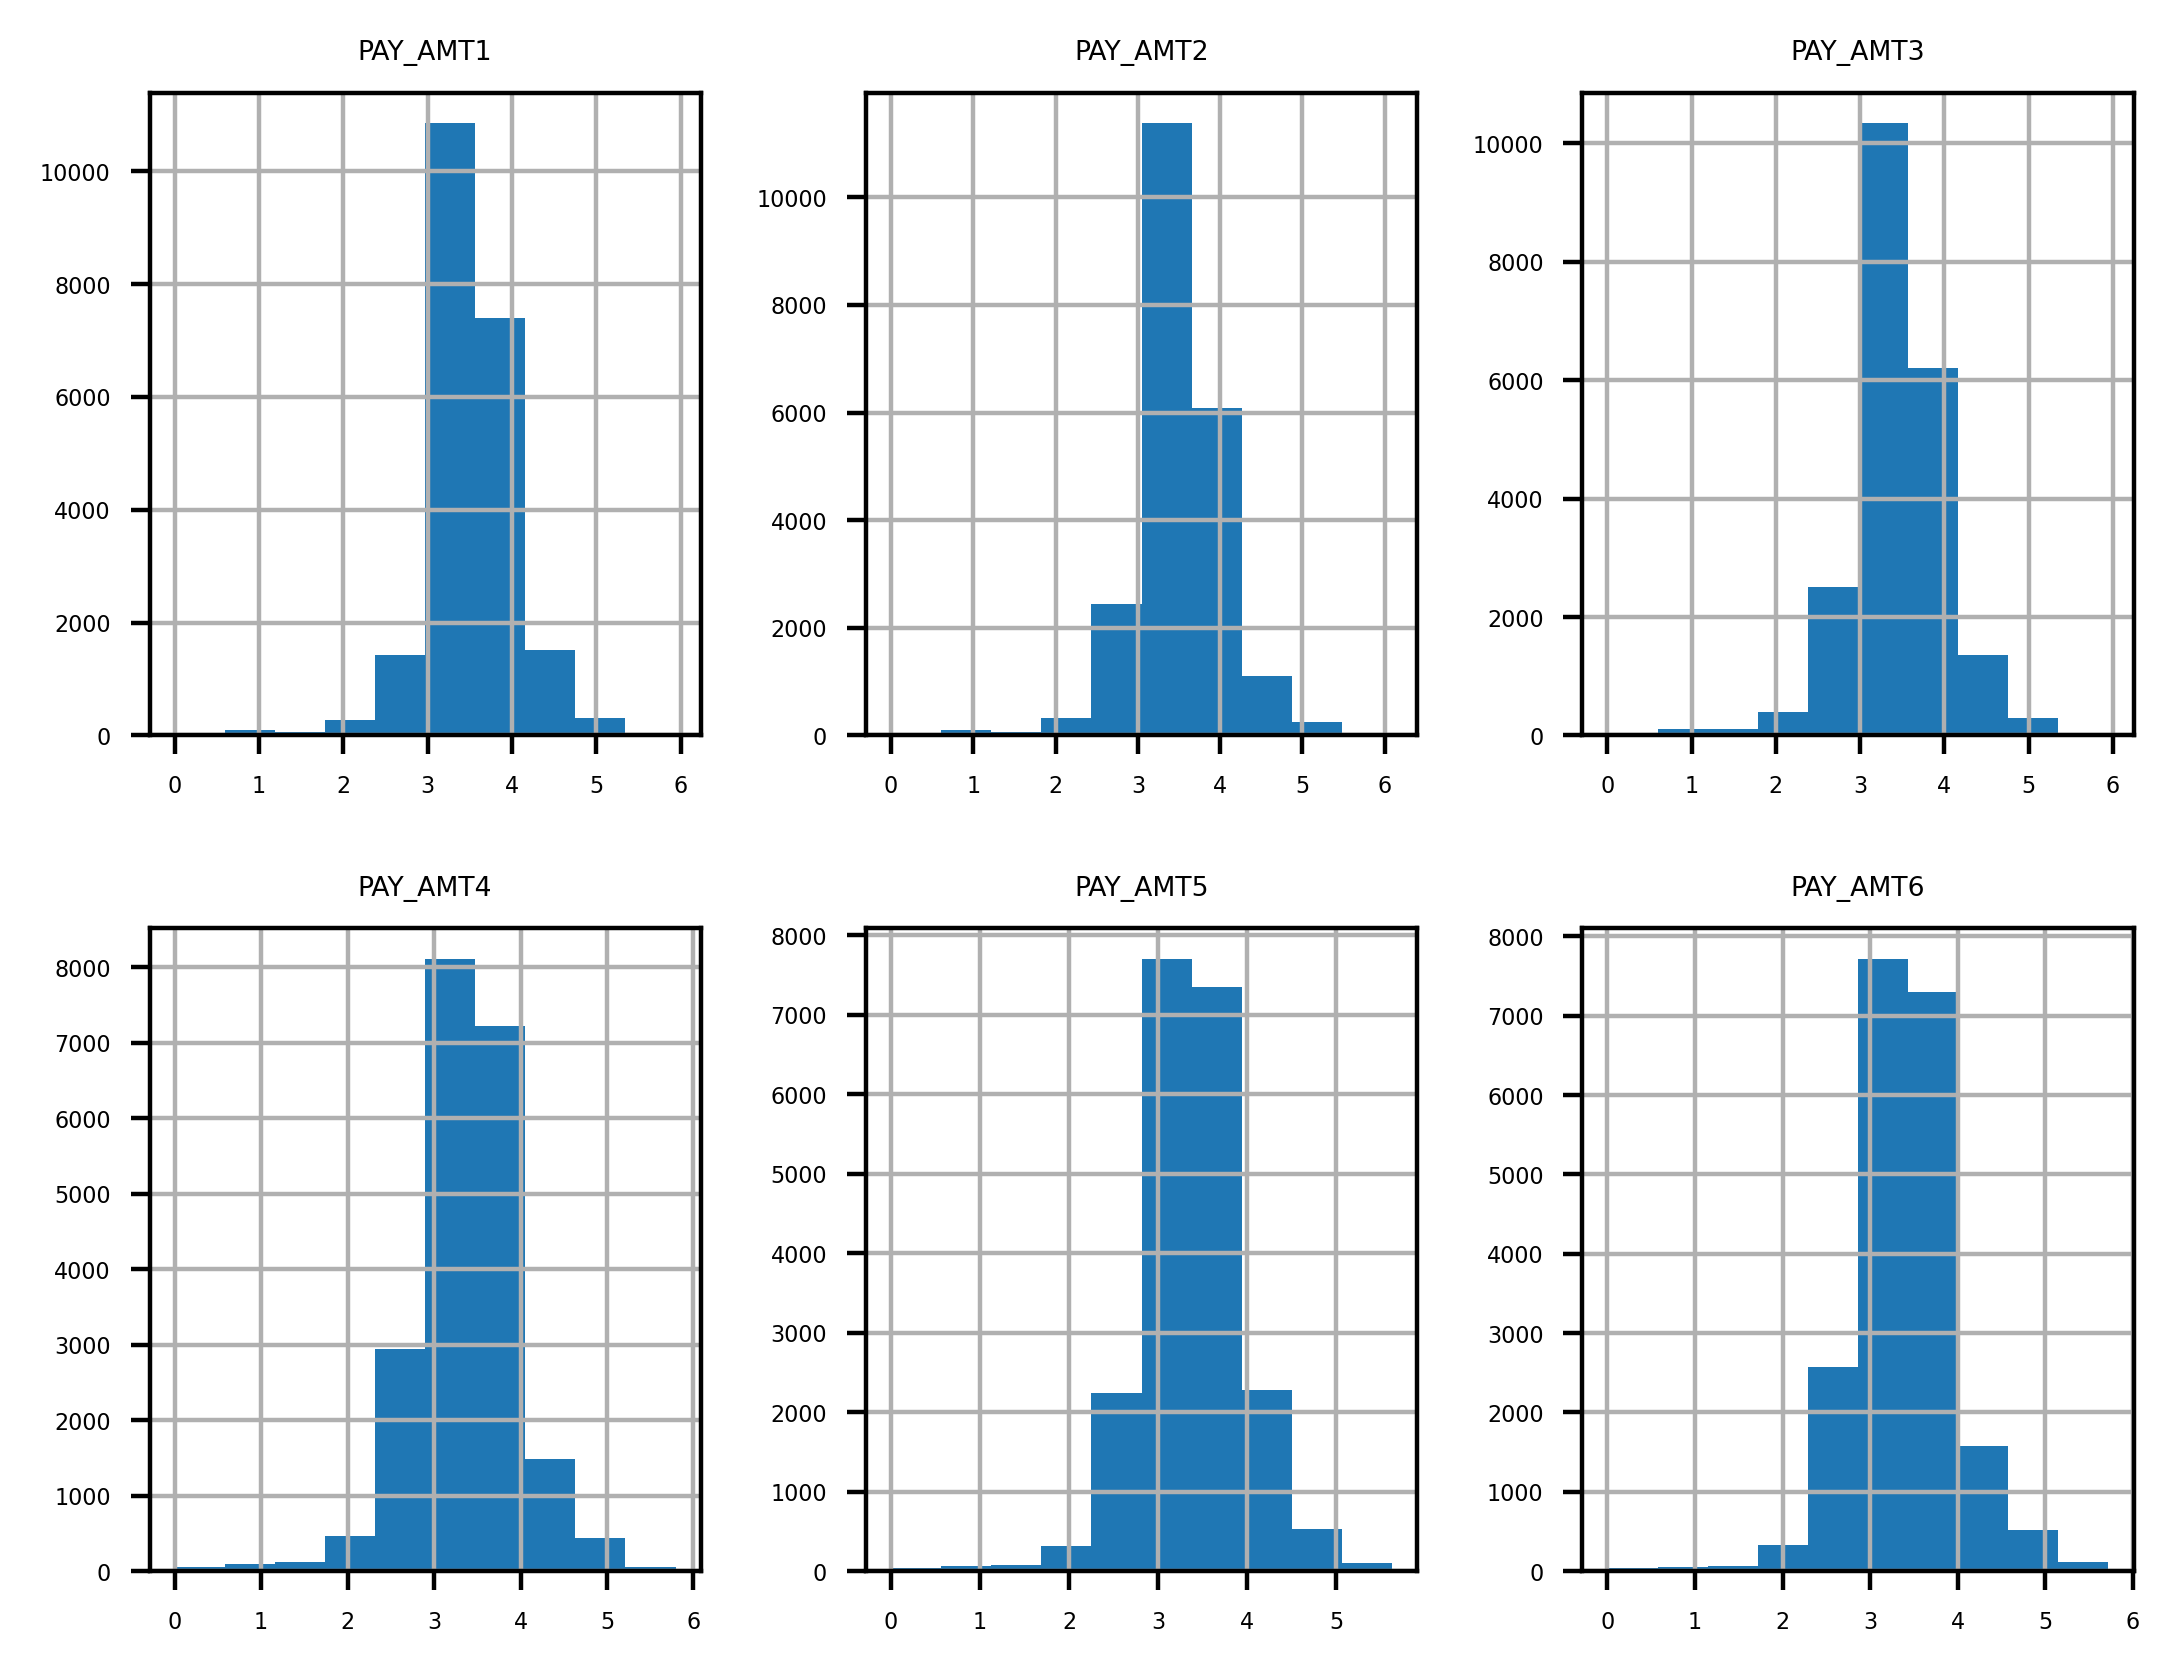

In [264]:
%matplotlib inline

df[pay_amt_feats][~pay_zero_mask].apply(np.log10).hist(layout=(2,3))
plt.show()